In [110]:
#Import Libraries
import requests
from bs4 import BeautifulSoup

#Specify the URL
url = 'https://en.wikipedia.org/wiki/Religion_in_the_Philippines'

#Fetch the Web Page
page = requests.get(url)
    
#Parse HTML with BeautifulSoup
soup = BeautifulSoup(page.text, 'html')

In [173]:
#Find the table that contains the data.
table = soup.find_all('table')[2]

In [292]:
# Initialize a list to store your data
data = []
# Iterate through each row (<tr>) in the table
for row in table.find_all('tr'):
    # Initialize a list to store cells of current row
    row_data = []
    # Iterate through each cell (<td>) in the row
    for cell in row.find_all(['td', 'th']):  # include th for table headers
        # Append the text content of cell to row_data list
        row_data.append(cell.get_text(strip=True))
    # Append the row data list to the main data list
    data.append(row_data)

# Now 'data' contains all the data from the table
# You can print it or further process it as needed
for row in data:
    print(row)

['Affiliation', 'Number', 'Percentage']
['Roman Catholic[a]', '85,645,362', '78.8%']
['Islam', '6,981,710', '6.4%']
['Iglesia ni Cristo', '2,806,524', '2.6%']
['Philippine Independent Church', '1,458,992', '1.4%']
['Seventh-day Adventist', '1,441,740', '1.3%']
['The Church of Jesus Christ of Latter-day Saints', '853,254', '0.8%']
['Bible Baptist Church', '540,364', '0.5%']
['United Church of Christ in the Philippines', '470,792', '0.4%']
["Jehovah's Witnesses", '457,245', '0.4%']
['Church of Christ', '429,921', '0.4%']
['Other religious affiliations', '8,954,291', '8.2%']
['None', '43,931', '0%']
['Not reported', '15,186', '0%']
['Total', '108,667,043', '100%']
['Source:Philippine Statistics Authority[4]']


In [294]:
# Convert data to a pandas DataFrame
import pandas as pd

df = pd.DataFrame(data[1:], columns=data[0])  # assuming first row is header
print(df)

   Affiliation                                      Number       Percentage
0                                 Roman Catholic[a]   85,645,362  78.8%    
1                                             Islam    6,981,710   6.4%    
2                                 Iglesia ni Cristo    2,806,524   2.6%    
3                     Philippine Independent Church    1,458,992   1.4%    
4                             Seventh-day Adventist    1,441,740   1.3%    
5   The Church of Jesus Christ of Latter-day Saints      853,254   0.8%    
6                              Bible Baptist Church      540,364   0.5%    
7        United Church of Christ in the Philippines      470,792   0.4%    
8                               Jehovah's Witnesses      457,245   0.4%    
9                                  Church of Christ      429,921   0.4%    
10                     Other religious affiliations    8,954,291   8.2%    
11                                             None       43,931     0%    
12          

In [296]:
#CLEAN THE DATA
# Filter out non-data rows (assuming 'Total' and 'Source:' are not part of the data)
filtered_data = [row for row in data if row[0] != 'Total' and not row[0].startswith('Source:')]

# Convert filtered data to a pandas DataFrame
df1 = pd.DataFrame(filtered_data[1:], columns=filtered_data[0])  # assuming first row is header
# Print the DataFrame to verify
print(df1)


   Affiliation                                      Number      Percentage
0                                 Roman Catholic[a]  85,645,362  78.8%    
1                                             Islam   6,981,710   6.4%    
2                                 Iglesia ni Cristo   2,806,524   2.6%    
3                     Philippine Independent Church   1,458,992   1.4%    
4                             Seventh-day Adventist   1,441,740   1.3%    
5   The Church of Jesus Christ of Latter-day Saints     853,254   0.8%    
6                              Bible Baptist Church     540,364   0.5%    
7        United Church of Christ in the Philippines     470,792   0.4%    
8                               Jehovah's Witnesses     457,245   0.4%    
9                                  Church of Christ     429,921   0.4%    
10                     Other religious affiliations   8,954,291   8.2%    
11                                             None      43,931     0%    
12                       

In [298]:
df1.head(13)

,Affiliation,Number,Percentage
0,Roman Catholic[a],"85,645,362",78.8%
1,Islam,"6,981,710",6.4%
2,Iglesia ni Cristo,"2,806,524",2.6%
3,Philippine Independent Church,"1,458,992",1.4%
4,Seventh-day Adventist,"1,441,740",1.3%
5,The Church of Jesus Christ of Latter-day Saints,"853,254",0.8%
6,Bible Baptist Church,"540,364",0.5%
7,United Church of Christ in the Philippines,"470,792",0.4%
8,Jehovah's Witnesses,"457,245",0.4%
9,Church of Christ,"429,921",0.4%


In [253]:
# Convert 'Number' column to numeric (remove commas and convert to int or float)
df1['Number'] = df1['Number'].str.replace(',', '').astype(int)

# Convert 'Percentage' column to numeric (remove % sign and convert to float)
df1['Percentage'] = df1['Percentage'].str.replace('%', '').astype(float)

# Calculate the total
total_number = df1['Number'].sum()
total_percentage = df1['Percentage'].sum()

# Display the total
print(f'Total Number: {total_number}')
print(f'Total Percentage: {total_percentage}%')

Total Number: 110099312
Total Percentage: 101.20000000000002%


In [258]:
df2 = df1.set_index('Affiliation')

<Axes: ylabel='Affiliation'>

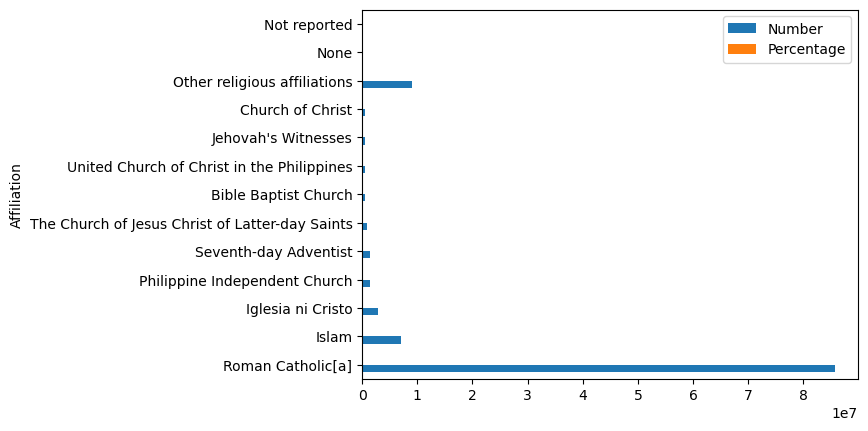

In [300]:
df2.plot(kind = 'barh')